In [1]:
import matplotlib.pyplot as plt
import numpy as np
import data 
import models 
import plot_functions
from pymatreader import read_mat
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, StratifiedKFold
#from keras.models import Sequential
#from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import nnmodels
colorpalette = ['#2D3748','#738CB8', '#FCA311','#BFEDC1'] #'#DDFDFE', '#42F2F7', '#D1E3DD', '#D1E3DD']

/mrhome/adrianvkh/anaconda3/envs/USSMEP/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
main_path = "/mnt/projects/USS_MEP/COIL_ORIENTATION"
filelist = data.get_all_paths(main_path)
X, y, groups, list_subjects = data.get_all_data(filelist)

In [3]:
X_norm = data.normalize_X(X, groups)
X_amplitude, X_latency,X_ampl_late, X_diff,X_fft = data.other_X(X)

In [34]:
#np.save('X.npy', X) # save
#np.save('y.npy', y) # save
#np.save('groups.npy', groups) # save
#np.save('X_normalized.npy', X_norm) ## save




## Initial 

##### Checker, is any trial flat?

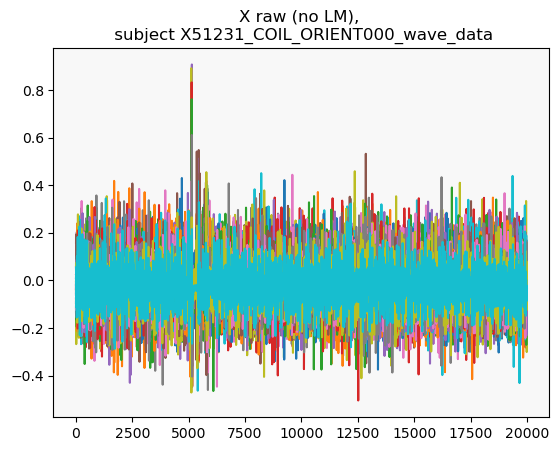

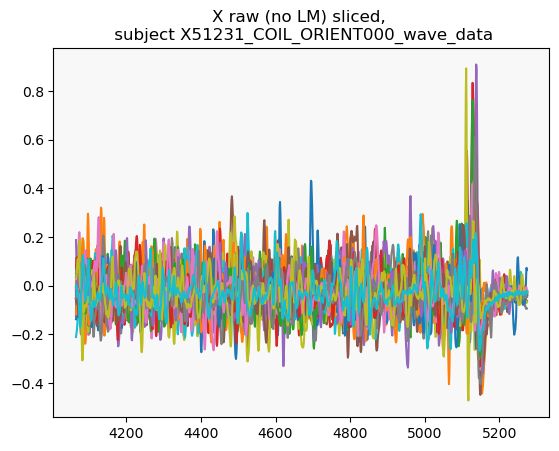

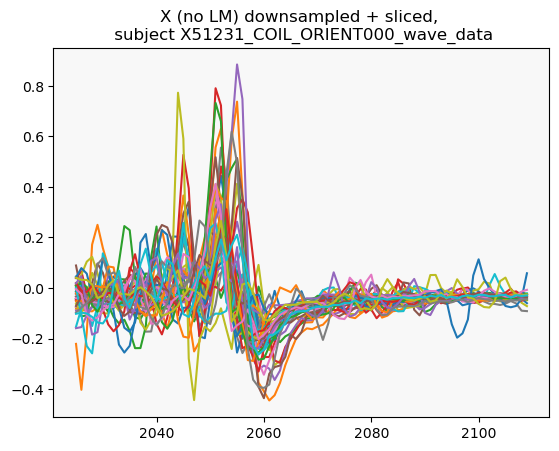

In [146]:
path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/X06188_coil_orient.mat"
path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/X51231_CoilOrientation.mat" #bliver meget spids
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/X05398_coil_orient.mat" #bliver hakket ved downsampling
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/sub-X36523_ses-1_task-coilorientation_emg.mat"
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/sub-X86768_ses-1_task-coilorientation_run001_emg.mat"
data1 = read_mat(path)
if "sub" in path:
    key = list(data1.keys())[3]
else:
    key = list(data1.keys())[0]

X_raw = data1[key]['values'][:,0]
y = data1[key]['frameinfo']['state']
X_raw, y = data.delete_frames(X_raw,y) #X_raw her er det originale data for den path. slice det for at se signal

plt.title("X raw (no LM), \n subject "+str(key))
plt.plot(X_raw)
plt.show()
plt.title("X raw (no LM) sliced, \n subject "+str(key))
if "sub" not in path:
    plt.plot(np.arange(4065, 5275),X_raw[4065:5275])
else:
    plt.plot(np.arange(2065, 2275),X_raw[4065:2275])
plt.show()


# Downsample
if len(X_raw)==20000:
    downsampled_X_raw = []
    for i in range(len(X_raw[0])):
        downsampled_X_raw.append(data.downsample(np.transpose(X_raw)[i], 8000).tolist())
    downsampled_X_raw = np.transpose(downsampled_X_raw)
plt.title("X (no LM) downsampled + sliced, \n subject "+str(key))
if "sub" not in path:
    X_sliced = downsampled_X_raw[2025:2110]
    plt.plot(np.arange(2025, 2110),X_sliced)
else:
    X_sliced = downsampled_X_raw[4025:4110]
    plt.plot(np.arange(4025, 4110),X_sliced)


plt.show()



In [41]:
X_amplitude, X_latency,X_ampl_late, X_diff,X_fft = data.other_X(X)

X_mean = X.mean(-1)
X_diff = np.diff(X)

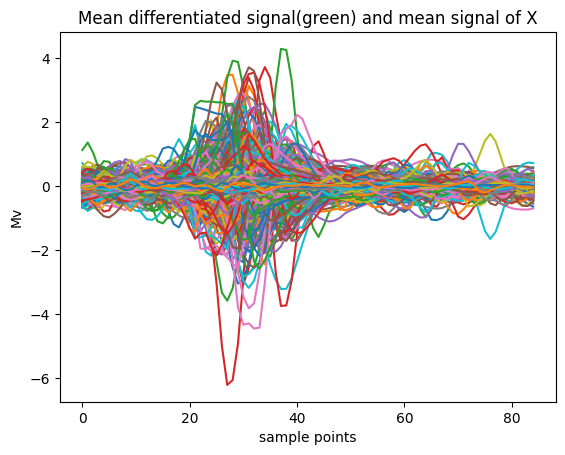

In [86]:
plt.plot(X_diff)
#plt.plot(X.mean(-1), color="blue")

# Add a title and labels to the plot
plt.title("Mean differentiated signal(green) and mean signal of X")
plt.xlabel("sample points")
plt.ylabel("Mv")

# Display the plot
plt.show()


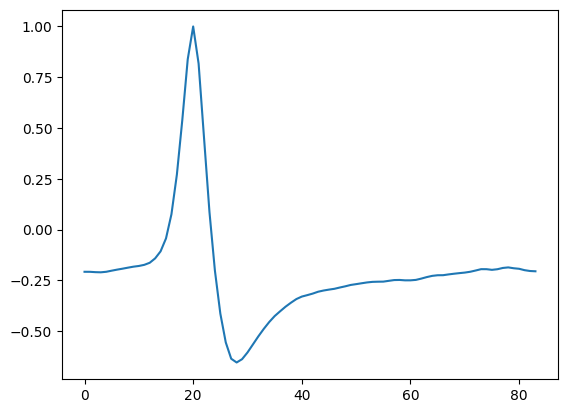

In [91]:
plt.plot(X_norm.mean(-1))

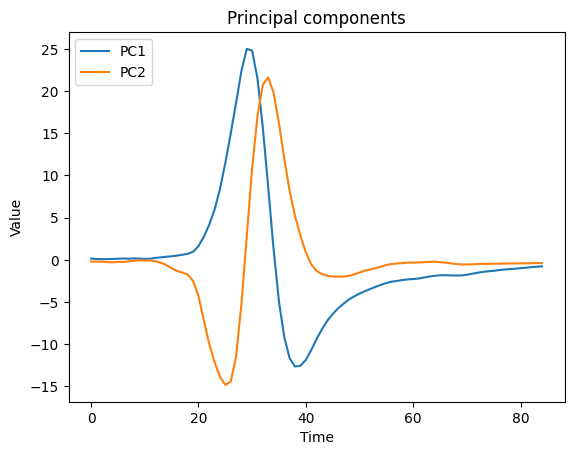

In [89]:
plot_functions.PCA(X, explained = False, n=2, PCAs = True)

In [42]:
X_norm = data.normalize_X(X, groups)
X_amplitude, X_latency,X_ampl_late, X_diff,X_fft = data.other_X(X_norm)


##### Visualizing X and X_norm

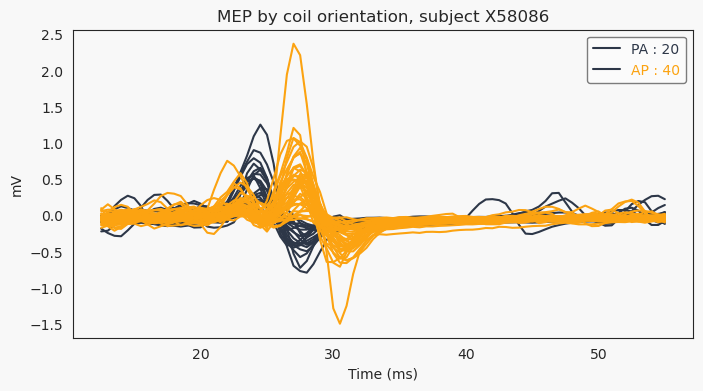

In [45]:
plot_functions.plot_subject_coil(X,y,list_subjects,groups,False,7)

22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5
22.5


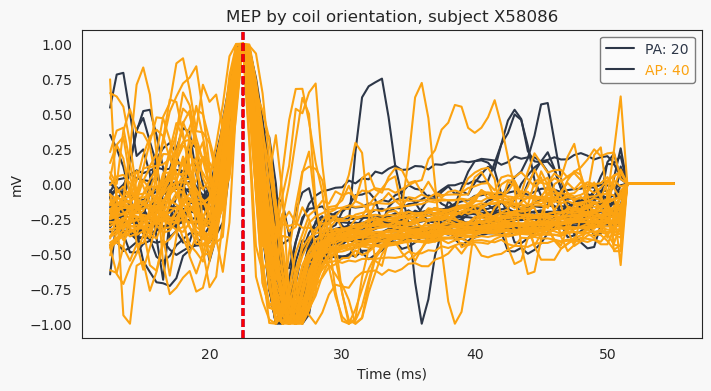

In [5]:
plot_functions.plot_subject_coil(X_norm,y,list_subjects,groups,False,7)

In [42]:
# Find the positions of the maximum points along the feature length
max_positions = np.argmax(X_norm, axis=0)

# Find the corresponding x-axis values
x_axis_values = np.arange(X_norm.shape[1])  # Assuming the x-axis values are sequential

# Print the x-axis values for each row
for row, position in enumerate(max_positions):
    x_value = x_axis_values[position]
    print(f"Row {row}: Maximum point at x-axis value {x_value}")

Row 0: Maximum point at x-axis value 20
Row 1: Maximum point at x-axis value 20
Row 2: Maximum point at x-axis value 20
Row 3: Maximum point at x-axis value 20
Row 4: Maximum point at x-axis value 20
Row 5: Maximum point at x-axis value 20
Row 6: Maximum point at x-axis value 20
Row 7: Maximum point at x-axis value 20
Row 8: Maximum point at x-axis value 20
Row 9: Maximum point at x-axis value 20
Row 10: Maximum point at x-axis value 20
Row 11: Maximum point at x-axis value 20
Row 12: Maximum point at x-axis value 20
Row 13: Maximum point at x-axis value 20
Row 14: Maximum point at x-axis value 20
Row 15: Maximum point at x-axis value 20
Row 16: Maximum point at x-axis value 20
Row 17: Maximum point at x-axis value 20
Row 18: Maximum point at x-axis value 20
Row 19: Maximum point at x-axis value 20
Row 20: Maximum point at x-axis value 20
Row 21: Maximum point at x-axis value 20
Row 22: Maximum point at x-axis value 20
Row 23: Maximum point at x-axis value 20
Row 24: Maximum point at x

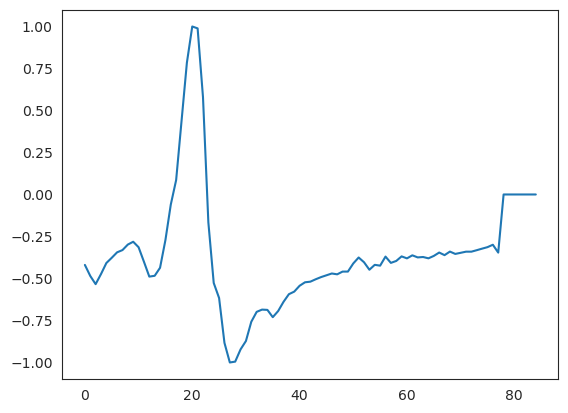

In [6]:
plt.plot(X_norm[:,2])

##### Plot specific subject

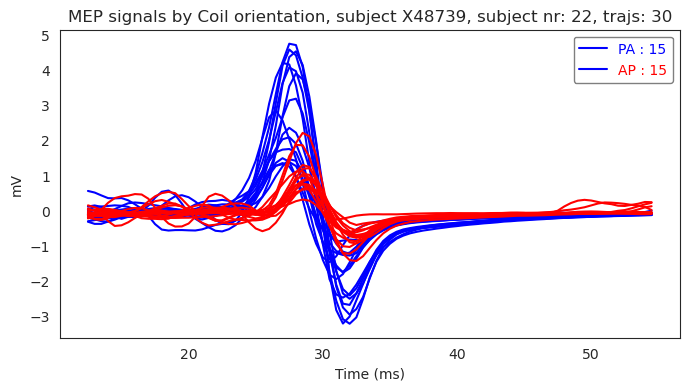

In [7]:
# Plot Specific groups
#plot_groups(X, groups, list_subjects=list_subjects, specifics = [5,18,19,31,32])

# Plot all subjects by coil orientations, PA and AP
#plot_coil(X,y, list_subjects, groups, mean = False, subject = None)

subject = 22 # set specific subject
plot_functions.plot_subject_coil(X,y,list_subjects,groups,mean=False,subject=subject)

#### Logistic Regression models

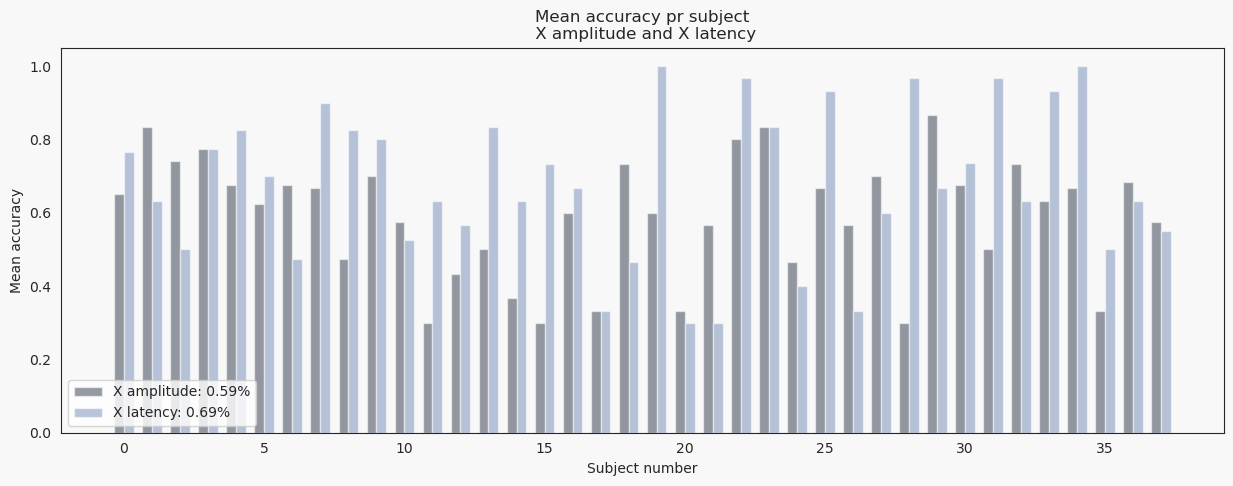

In [5]:
# 10-fold stratified cross validation PR SUBJECT
tot_scores_x, tot_indi_scores, mean_indi_scores_X, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X_amplitude, y, groups, onerow = True)
# 10-fold stratified cross validation PR SUBJECT on X normalized
tot_scores_xnorm, tot_indi_scores, mean_indi_scores_X_norm, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X_latency, y, groups, onerow = True)


plot_functions.barplotmix(groups, mean_indi_scores_X, mean_indi_scores_X_norm, acc_x = np.mean(tot_scores_x), acc_xnorm = np.mean(tot_scores_xnorm), xtype_title = 'X amplitude and X latency')

#mean_accuracy_pr_subject_X_Xnorm

0.9215988835725678
number of subjects: 38


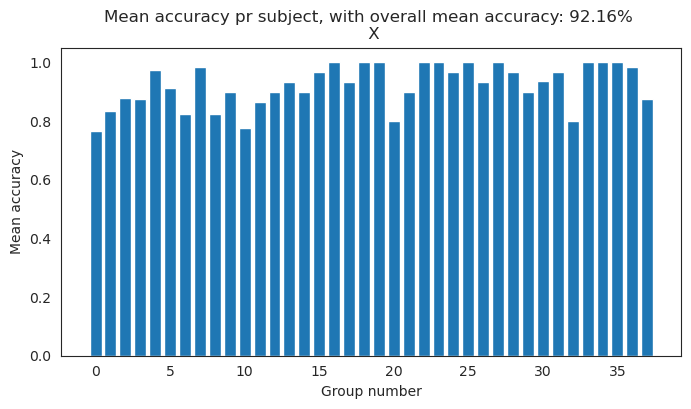

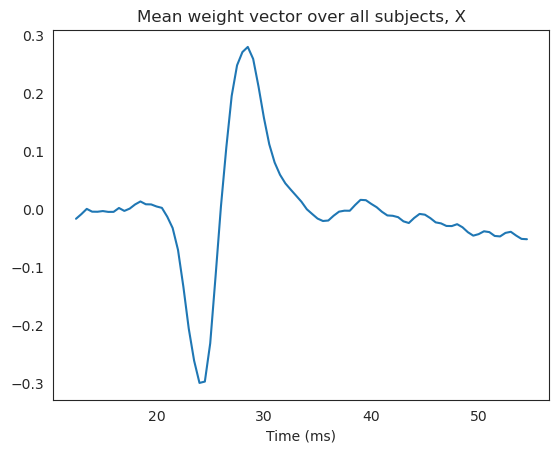

In [5]:
# 10-fold stratified cross validation PR SUBJECT
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X')

plt.title('Mean weight vector over all subjects, X')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

0.6469816586921849
number of subjects: 38


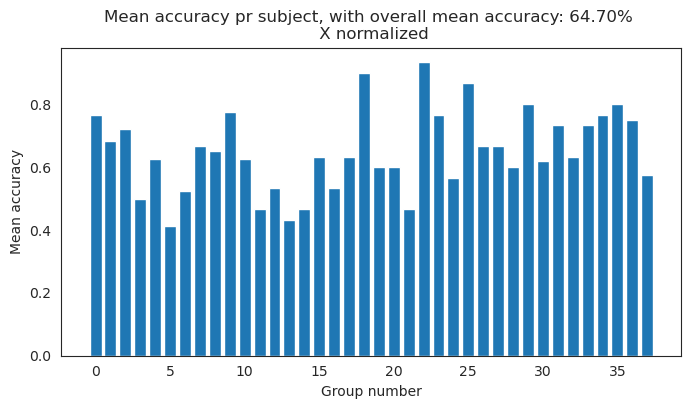

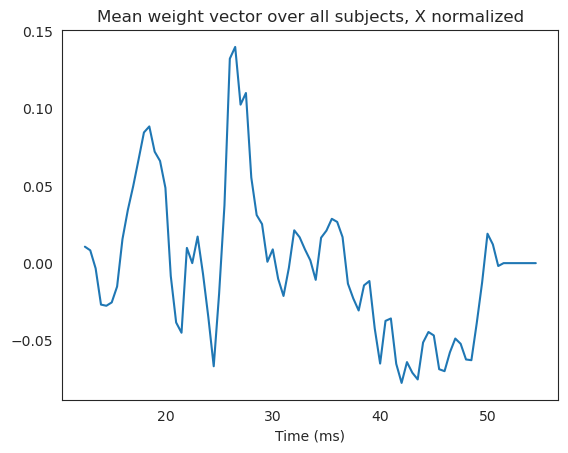

In [8]:
X_norm = data.normalize_X(X, groups)
# 10-fold stratified cross validation PR SUBJECT on X normalized
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X_norm, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X_norm')

plt.title('Mean weight vector over all subjects, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

0.9242384370015949
number of subjects: 38


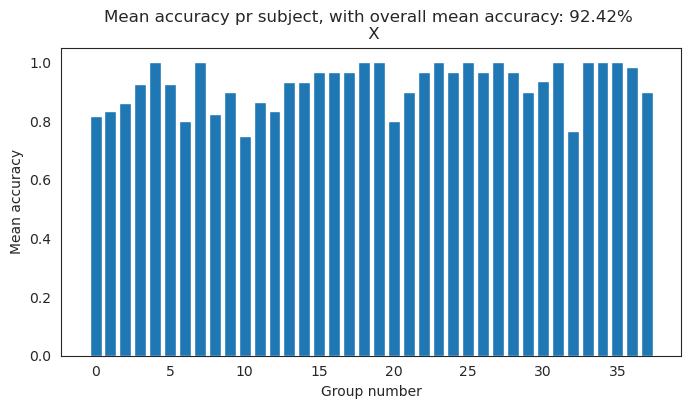

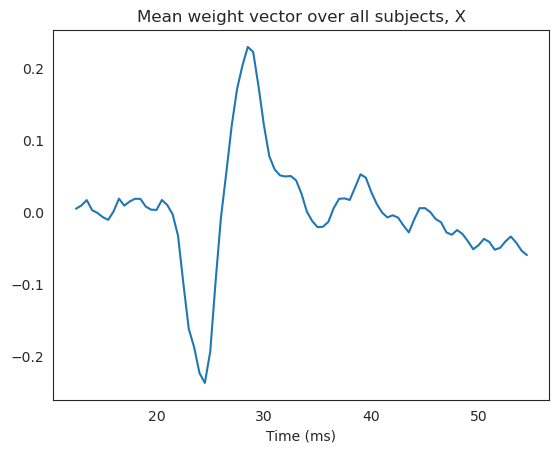

In [7]:
# 10-fold stratified cross validation PR SUBJECT SVM!
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X')

plt.title('Mean weight vector over all subjects, X')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

0.6487240829346094
number of subjects: 38


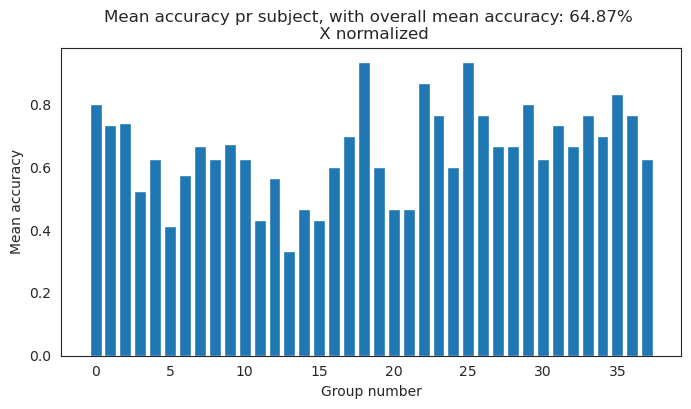

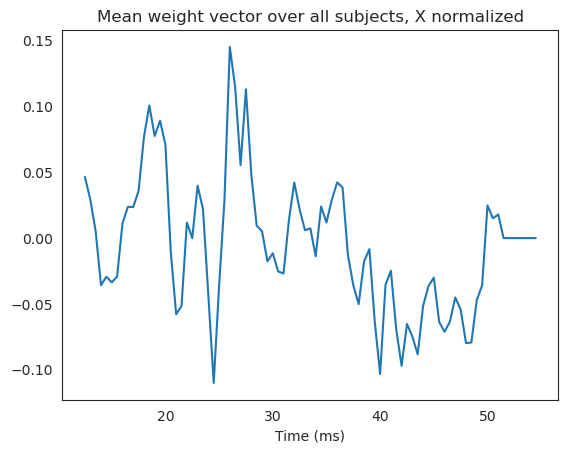

In [9]:
X_norm = data.normalize_X(X, groups)
# 10-fold stratified cross validation PR SUBJECT SVM! NORMALIZED
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X_norm, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X_norm')

plt.title('Mean weight vector over all subjects, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

Scores for amplitude feature: 0.5081310558385775
Scores for latency feature: 0.5088402756967335
Scores for amplitude and latency feature: 0.5081310558385775
Scores for all features X: 0.6799120966936371


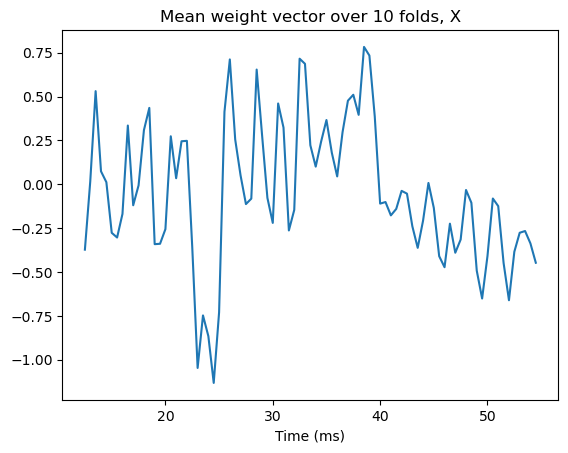

In [14]:
# General log reg model 10fold cv
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_amplitude, y, onerow = True)
print(f"Scores for amplitude feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_latency, y, onerow = True)
print(f"Scores for latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_ampl_late, y, onerow = True)
print(f"Scores for amplitude and latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X, y, onerow = False)
print(f"Scores for all features X: {mean_score}")


STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA
plt.title('Mean weight vector over 10 folds, X')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))


Scores for all features X normalized: 0.5505194286285087


/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

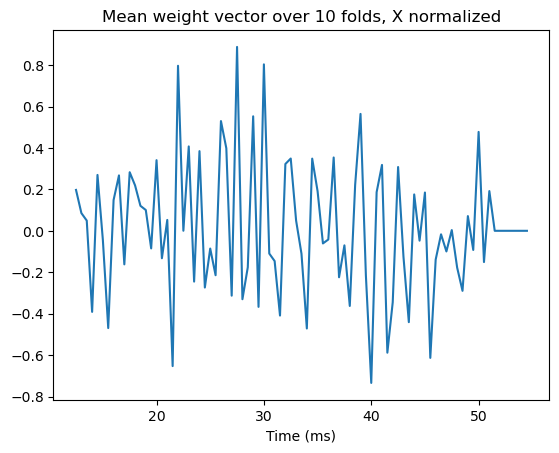

In [15]:
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_norm, y, onerow = False)
print(f"Scores for all features X normalized: {mean_score}")
plt.title('Mean weight vector over 10 folds, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))

Scores for amplitude feature: 0.5081310558385775
Scores for latency feature: 0.5088402756967335
Scores for amplitude and latency feature: 0.5081310558385775
Scores for all features X: 0.6799120966936371


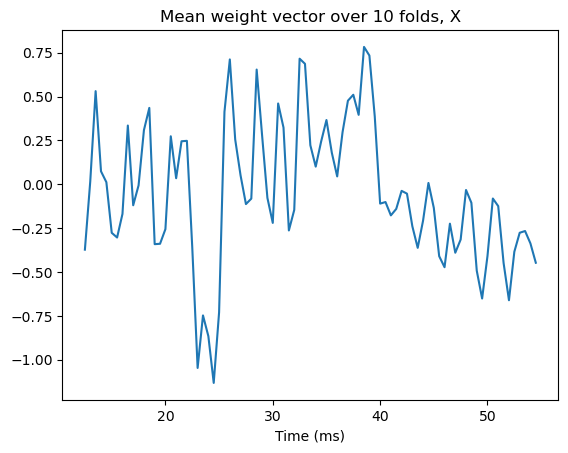

In [17]:
# General svm model 10fold cv X
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_amplitude, y, onerow = True)
print(f"Scores for amplitude feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_latency, y, onerow = True)
print(f"Scores for latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_ampl_late, y, onerow = True)
print(f"Scores for amplitude and latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X, y, onerow = False)
print(f"Scores for all features X: {mean_score}")


STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA
plt.title('Mean weight vector over 10 folds, X')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))

Scores for all features X normalized: 0.5505194286285087


/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

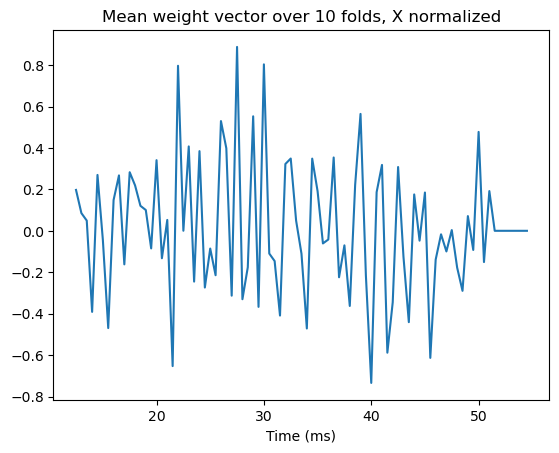

In [16]:
# SVM generel X normalized
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_norm, y, onerow = False)
print(f"Scores for all features X normalized: {mean_score}")
plt.title('Mean weight vector over 10 folds, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))

## PCA (component analysis)

In [7]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [28]:
colorpalette = ["#FCA311", "#F9A128", "#F79B41", "#F69756", "#F3926B", "#EF8D80", "#EC8994", "#E984A9", "#E67FBF", "#E379D3"]
colorpalette = ["#1C2A3A", "#354656", "#738CB8", "#8AA2B8", "#A8C0CD"]
colorpalette =  ["#334E6C", "#4A6885", "#6D8FB8", "#87A7C2", "#A0C0CC"]
custom_palette_ct_12 = sns.color_palette(colorpalette)
print(np.transpose(X).shape)
print(np.transpose(X_norm).shape)
Xt = np.transpose(X)
Xnormt = np.transpose(X_norm)
n = 10
pca1 = PCA(n_components= n)
pca1.fit(Xnormt)
components = pca1.components_
print(Xt.shape)
print(Xnormt.shape)

(1415, 86)
(1415, 86)
(1415, 86)
(1415, 86)


In [29]:
fig, axes = plt.subplots(n, 1, figsize=(15, 15), sharex=True)
plt.style.use({"axes.facecolor": "#F8F8F8"})
fig.set_facecolor("#F8F8F8")

# Generate time points between 12 ms and 54.5 ms with steps of 0.5
time_points = np.arange(12, 55, 0.5)
print(len(time_points))
for i in range(n):
    # Multiply the first component by -1 - remove from X
    component = components[i, :] if i != 0 else -components[i, :]
    
    barplot = sns.barplot(
        x=time_points,  # this assumes you have 85 features
        y=component,
        color='#738CB8',
        ax=axes[i]
    )

    if i == 0:
        axes[i].set_title("Explained variance for PCA components", fontsize=20)

    axes[i].set_ylabel(f"PC{i + 1}", fontsize=16)

# Rotate x-axis labels for better readability
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.xlabel("Time (ms)", fontsize=16)
plt.tight_layout()

plt.savefig(f'Result_images/PCA/PCA_features_{n}_Xnorm.png', dpi=100, bbox_inches='tight')
plt.close(fig)

86


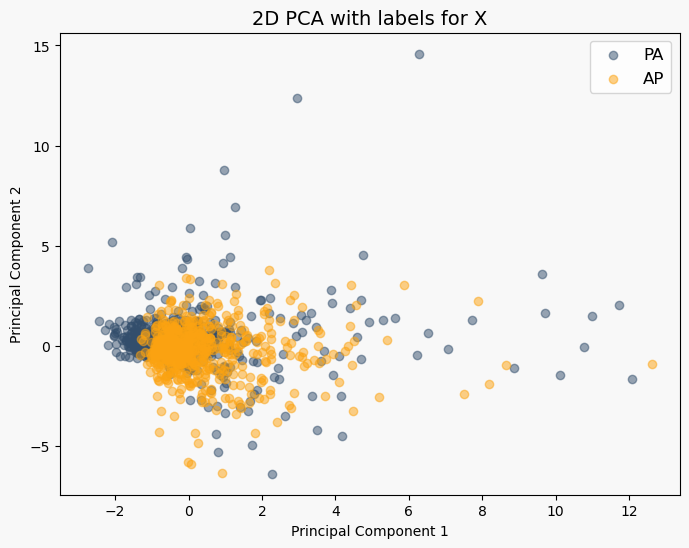

In [88]:
# Assuming X is your data matrix and y is your label list

# Initialize PCA and reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define a color map and label map
color_map = {1: '#334E6C', 2: '#FCA311'}
label_map = {1: 'PA', 2: 'AP'}

# Plot the data
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor('#F8F8F8')
ax.set_facecolor('#F8F8F8')  # This line sets the inside of the plot to grey

for label in np.unique(y):
    mask = y == label
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color_map[label], label=label_map[label], alpha=0.5)

# Setting axis labels with increased font size
ax.set_xlabel('Principal Component 1', fontsize=10)
ax.set_ylabel('Principal Component 2', fontsize=10)

# Setting plot title with increased font size
ax.set_title('2D PCA with labels for X', fontsize=14)

plt.legend( fontsize=12, title_fontsize=10)
plt.show()

(1415, 86)
(1415, 86)


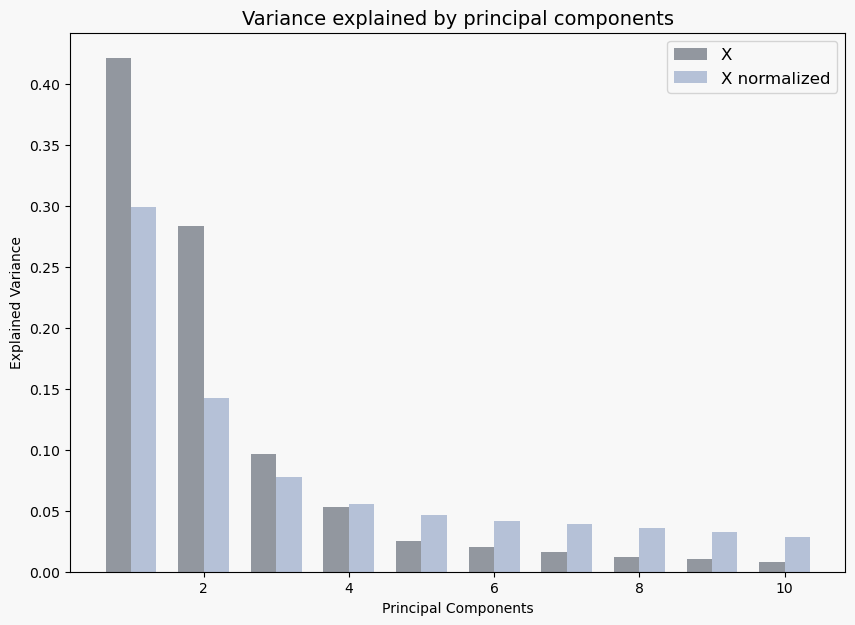

In [156]:
# Initialize PCA
pca = PCA(n_components=10)
pca_norm = PCA(n_components=10)
print(np.transpose(X).shape)
print(np.transpose(X_norm).shape)
# Perform PCA on both X and X_norm
X_pca2 = pca.fit(np.transpose(X))
X_pca_norm2 = pca_norm.fit(np.transpose(X_norm))

# Plot the data
fig, ax = plt.subplots(figsize=(10, 7))
fig.set_facecolor('#F8F8F8')
ax.set_facecolor('#F8F8F8') 

# Number of components 
n_components = 10

# Define the width of the bars and their positions
width = 0.35
x = np.arange(1, n_components+1)

# Plot for X
ax.bar(x - width/2, X_pca2.explained_variance_ratio_, width, color='#2D3748', label='X', alpha=0.5)

# Plot for X_norm#738CB8#2D3748'
ax.bar(x + width/2, X_pca_norm2.explained_variance_ratio_, width, color='#738CB8', label='X normalized', alpha=0.5)

# Setting axis labels with increased font size
ax.set_xlabel('Principal Components', fontsize=10)
ax.set_ylabel('Explained Variance', fontsize=10)

# Setting plot title with increased font size
ax.set_title('Variance explained by principal components', fontsize=14)

ax.legend(fontsize=12)
plt.show()

In [136]:
print(X.shape)
print(np.transpose(X_norm).shape)

(86, 1415)
(1415, 86)


(1415, 86)
(1415, 86)


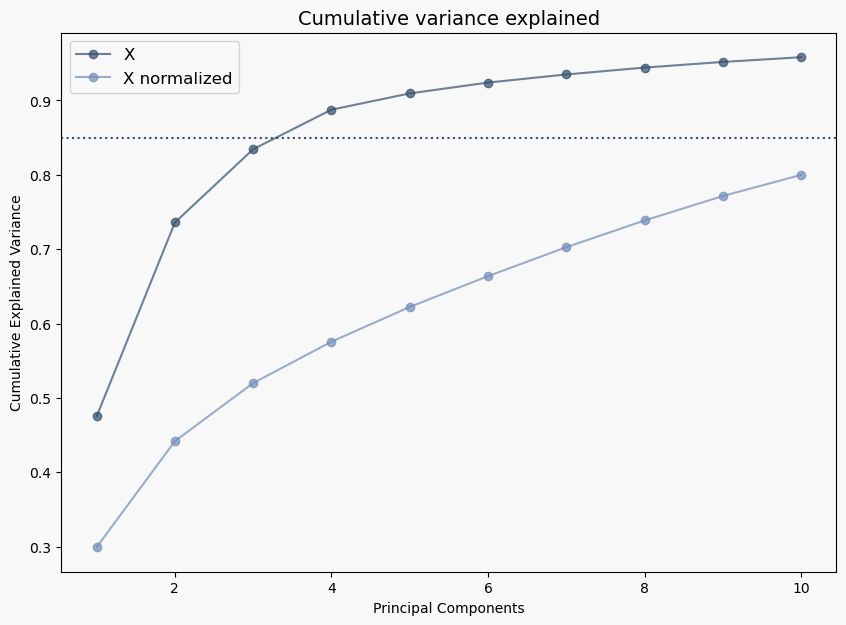

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X and X_norm are your data matrices
from sklearn.preprocessing import StandardScaler

# Assuming X_norm is your data matrix

print(np.transpose(X).shape)
print(np.transpose(X_norm).shape)
# Initialize PCA
pca = PCA(n_components=10)
pca_norm = PCA(n_components=10)
# Normalize X_norm



# Perform PCA on both X and X_norm
X_pca3 = pca.fit(X)
X_pca_norm3 = pca_norm.fit(np.transpose(X_norm))

# Calculate cumulative explained variance
X_cum_variance = np.cumsum(X_pca3.explained_variance_ratio_)
X_norm_cum_variance = np.cumsum(X_pca_norm3.explained_variance_ratio_)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 7))
fig.set_facecolor('#F8F8F8')
ax.set_facecolor('#F8F8F8') 

# Number of components 
n_components = 10

# Define the positions
x = np.arange(1, n_components+1)

# Plot for X
ax.plot(x, X_cum_variance, color='#334E6C', label='X', alpha=0.7, marker='o')

# Plot for X_norm
ax.plot(x, X_norm_cum_variance, color='#738CB8', label='X normalized', alpha=0.7, marker='o')
ax.axhline(y=0.85, linestyle='dotted', color='#334E6C')

# Setting axis labels with increased font size
ax.set_xlabel('Principal Components', fontsize=10)
ax.set_ylabel('Cumulative Explained Variance', fontsize=10)

# Setting plot title with increased font size
ax.set_title('Cumulative variance explained', fontsize=14)

ax.legend(fontsize=12)
plt.show()


## Activation patterns

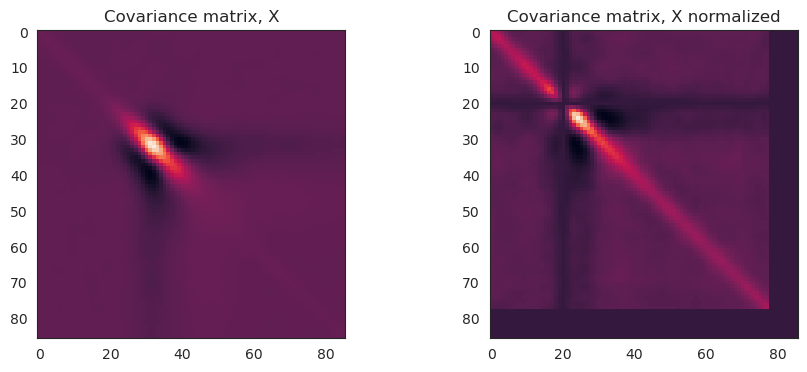

<Figure size 640x480 with 0 Axes>

In [20]:
#Sigma_x: Data covariance 
centered_X = np.transpose(X) - np.mean(X,axis=1)
covariance_matrix_X = np.cov(centered_X, rowvar=False)
centered_Xnorm = np.transpose(X_norm) - np.mean(X_norm,axis=1)
covariance_matrix_Xnorm = np.cov(centered_Xnorm, rowvar=False)

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.imshow(covariance_matrix_X)
ax1.set_title('Covariance matrix, X')

# Plot data on the second subplot
ax2.imshow(covariance_matrix_Xnorm)
ax2.set_title('Covariance matrix, X normalized')
#plt.imshow(covariance_matrix_Xnorm, origin = "lower") #flipped covariance matrix


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the figure
plt.show()

plt.savefig('Covariance.png', dpi=300)  # Specify the desired filename and DPI


Text(0.5, 1.0, 'Logistic regression Weight Coefficients, X normalized')

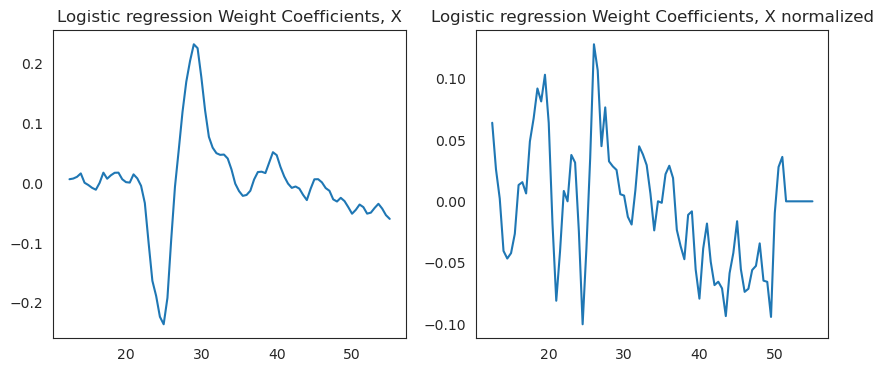

In [9]:
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X, y, groups, onerow = False)
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients_Xnorm = models.kfold_svm_prsubject_stratified(X_norm, y, groups, onerow = False)
W = np.mean(all_subject_coefficients, axis=0)
W_Xnorm = np.mean(all_subject_coefficients_Xnorm, axis=0)


# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, W)
ax1.set_title('Logistic regression Weight Coefficients, X')
# Plot data on the second subplot
ax2.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, W_Xnorm)
ax2.set_title('Logistic regression Weight Coefficients, X normalized')


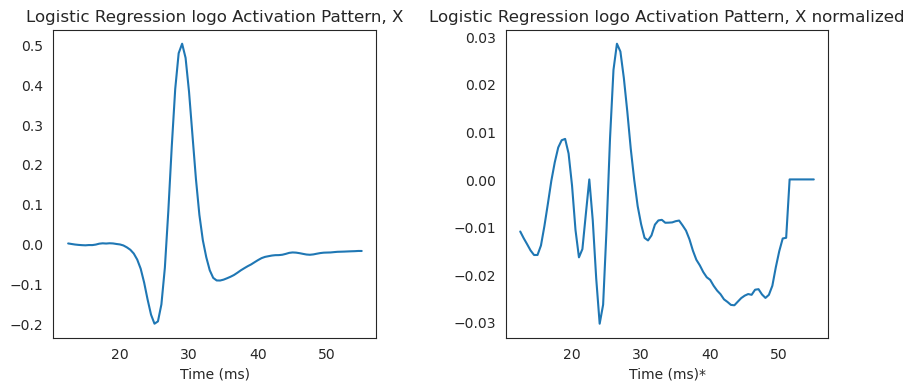

In [10]:
# compute the activation pattern: A = Sigma_x W Sigma_s, where Sigma_s is the covariance between the latent features
A = covariance_matrix_X @ W
A_Xnorm = covariance_matrix_Xnorm @ W_Xnorm

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, A)
ax1.set_xlabel("Time (ms)")
ax1.set_title('Logistic Regression logo Activation Pattern, X')

# Plot data on the second subplot
ax2.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, A_Xnorm)
ax2.set_xlabel("Time (ms)*")
ax2.set_title('Logistic Regression logo Activation Pattern, X normalized')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

##  Logistic regression, weight coefficients and activation patterns

#### X & X normalized activation patterns

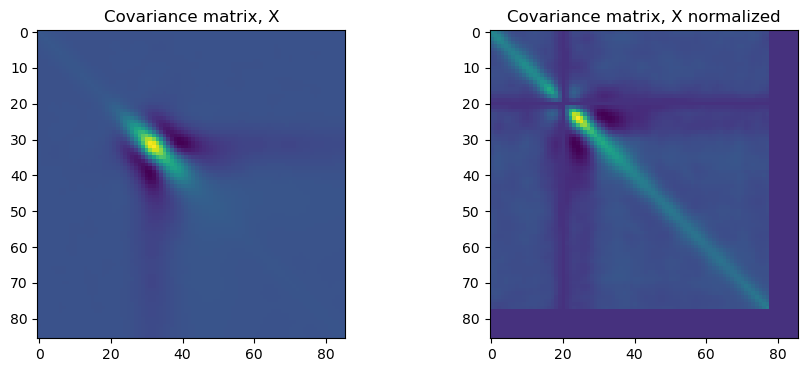

In [95]:
#Sigma_x: Data covariance 
centered_X = np.transpose(X) - np.mean(X,axis=1)
covariance_matrix_X = np.cov(centered_X, rowvar=False)
centered_Xnorm = np.transpose(X_norm) - np.mean(X_norm,axis=1)
covariance_matrix_Xnorm = np.cov(centered_Xnorm, rowvar=False)

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.imshow(covariance_matrix_X)
ax1.set_title('Covariance matrix, X')

# Plot data on the second subplot
ax2.imshow(covariance_matrix_Xnorm)
ax2.set_title('Covariance matrix, X normalized')
#plt.imshow(covariance_matrix_Xnorm, origin = "lower") #flipped covariance matrix


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the figure
plt.show()


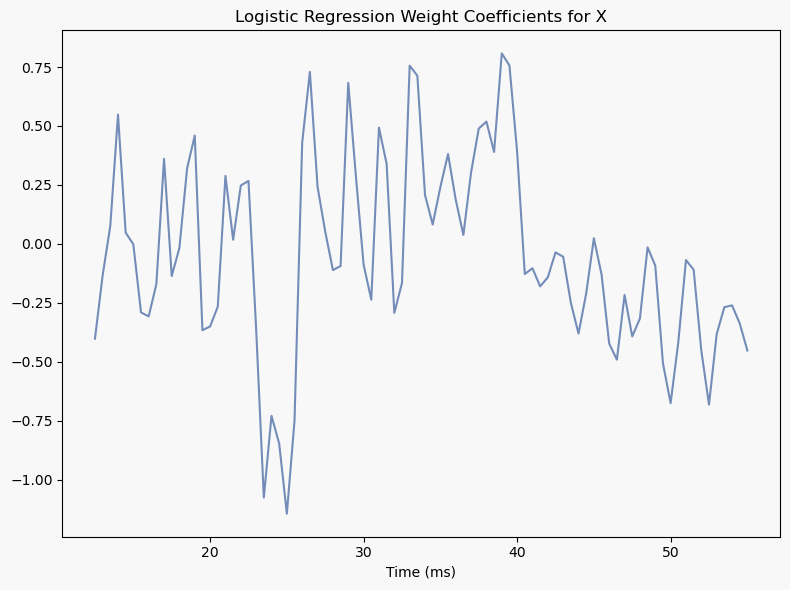

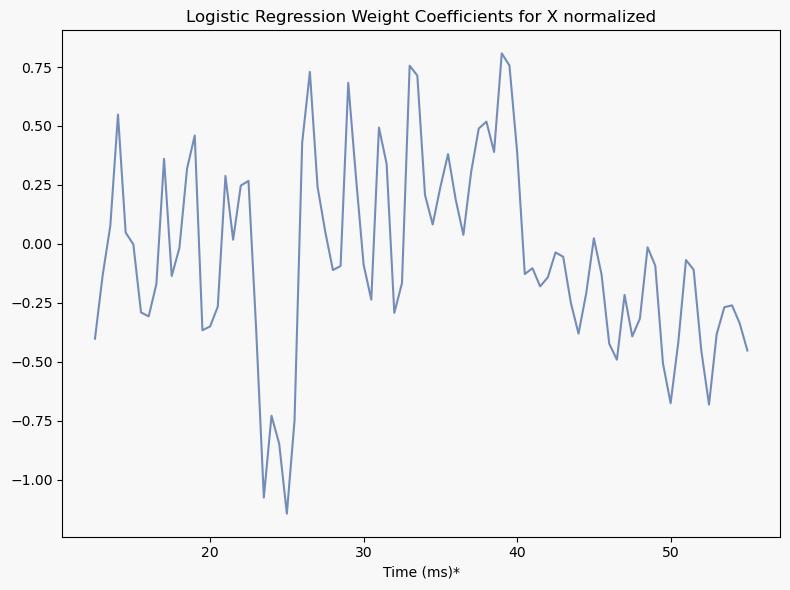

In [97]:
#tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X, y, groups, onerow = False)
#tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients_Xnorm = models.kfold_svm_prsubject_stratified(X_norm, y, groups, onerow = False)
#W = np.mean(all_subject_coefficients, axis=0)
#W_Xnorm = np.mean(all_subject_coefficients_Xnorm, axis=0)

scores, mean_score, coefficients_X = models.logo_logreg_model(X, y, groups, onerow =False)
scores, mean_score, coefficients_Xnorm = models.logo_logreg_model(X, y, groups, onerow =False)
W = np.mean(coefficients_X, axis=0)
W_Xnorm = np.mean(coefficients_Xnorm, axis=0)

# Define the color palette and background color
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']
background_color = '#F8F8F8'

# Create the first figure
fig1, ax1 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the first figure
ax1.set_facecolor(background_color)

# Plot data on the first figure
ax1.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, W, color=colorpalette[1])
ax1.set_title('Logistic Regression Weight Coefficients for X')
ax1.set_xlabel('Time (ms)')
#ax1.set_ylabel('Weight Coefficients')

# Adjust the layout
plt.tight_layout()

# Save the first figure as an image
fig1.savefig('LogisticWeightCoefficientsXLOGO.png', dpi=300)  # Specify the desired filename and DPI

# Create the second figure
fig2, ax2 = plt.subplots(figsize=(8,6), facecolor=background_color)

# Set the background color for the second figure
ax2.set_facecolor(background_color)

# Plot data on the second figure
ax2.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, W_Xnorm, color=colorpalette[1])
ax2.set_title('Logistic Regression Weight Coefficients for X normalized')
ax2.set_xlabel('Time (ms)*')
#ax2.set_ylabel('Weight Coefficients')

# Adjust the layout
plt.tight_layout()

# Save the second figure as an image
fig2.savefig('LogisticWeightCoefficientsXnormalizedLOGO.png', dpi=300)  # Specify the desired filename and DPI

# Close the figures to free up memory
#plt.close(fig1)
#plt.close(fig2)

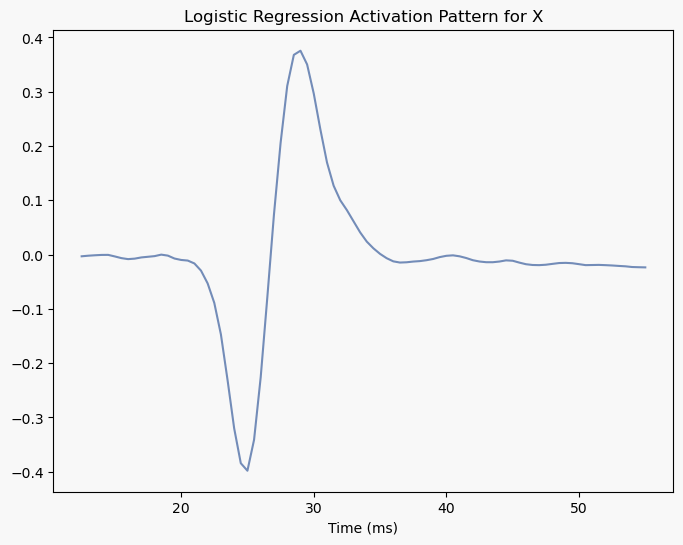

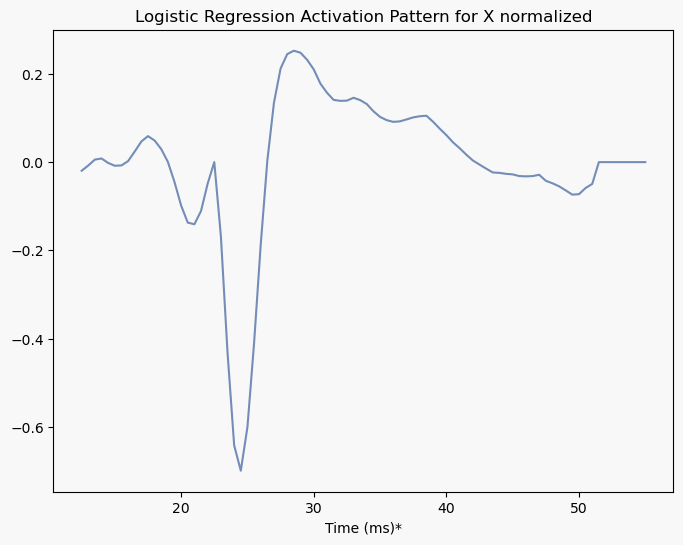

In [98]:
# compute the activation pattern: A = Sigma_x W Sigma_s, where Sigma_s is the covariance between the latent features
A = covariance_matrix_X @ W
A_Xnorm = covariance_matrix_Xnorm @ W_Xnorm

# Define the color palette and background color
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']
background_color = '#F8F8F8'

# Compute the activation pattern
A = covariance_matrix_X @ W
A_Xnorm = covariance_matrix_Xnorm @ W_Xnorm

# Create the first figure
fig1, ax1 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the first figure
ax1.set_facecolor(background_color)

# Plot data on the first figure
ax1.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, A, color=colorpalette[1])
ax1.set_xlabel("Time (ms)")
#ax1.set_ylabel("Activation Pattern")
ax1.set_title('Logistic Regression Activation Pattern for X')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Save the first figure as an image
fig1.savefig('LogisticActivationPattern_XLOGO.png', dpi=300)  # Specify the desired filename and DPI

# Create the second figure
fig2, ax2 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the second figure
ax2.set_facecolor(background_color)

# Plot data on the second figure
ax2.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, A_Xnorm, color=colorpalette[1])
ax2.set_xlabel("Time (ms)*")
#ax2.set_ylabel("Activation Pattern")
ax2.set_title('Logistic Regression Activation Pattern for X normalized')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Save the second figure as an image
fig2.savefig('LogisticActivationPattern_XnormalizedLOGO.png', dpi=300)  # Specify the desired filename and DPI



#### "NPAIR" method on activation patterns for split

In [75]:
# Create two almost equal size subsets of the data
np.random.seed(10) # set seed

# Get the unique groups and select half of them randomly
selected_groups = np.random.choice(np.unique(groups), size=np.unique(groups).shape[0]//2, replace=False)

# Create masks for selected and non-selected groups
mask_X1 = np.isin(groups, selected_groups)
mask_X2 = ~mask_X1

# Apply masks to X
X1 = X_norm[:, mask_X1]
X2 = X_norm[:, mask_X2]

# Apply masks to y
y_X1 = np.array(y)[mask_X1]
y_X2 = np.array(y)[mask_X2]

# Apply masks to groups
groups_X1 = np.array(groups)[mask_X1]
groups_X2 = np.array(groups)[mask_X2]

print(X1.shape)
print(X2.shape)

(86, 720)
(86, 695)


In [76]:
print(np.unique(groups_X1))
print(np.unique(groups_X2))
X1_PAs = np.transpose(X1)[np.where(y_X1==1)]
X1_APs = np.transpose(X1)[np.where(y_X1==2)]
print(f"PAs X1 {len(X1_PAs)}")
print(f"APs X1 {len(X1_APs)}")
print(f"check: {len(X1_PAs)+len(X1_APs)}")

X2_PAs = np.transpose(X2)[np.where(y_X2==1)]
X2_APs = np.transpose(X2)[np.where(y_X2==2)]
print(f"PAs X2 {len(X2_PAs)}")
print(f"APs X2 {len(X2_APs)}")
print(f"check: {len(X2_PAs)+len(X2_APs)}")

[ 1  2  3  5  6  7 11 12 13 14 18 20 21 22 23 24 32 33 35]
[ 0  4  8  9 10 15 16 17 19 25 26 27 28 29 30 31 34 36 37]
PAs X1 355
APs X1 365
check: 720
PAs X2 340
APs X2 355
check: 695


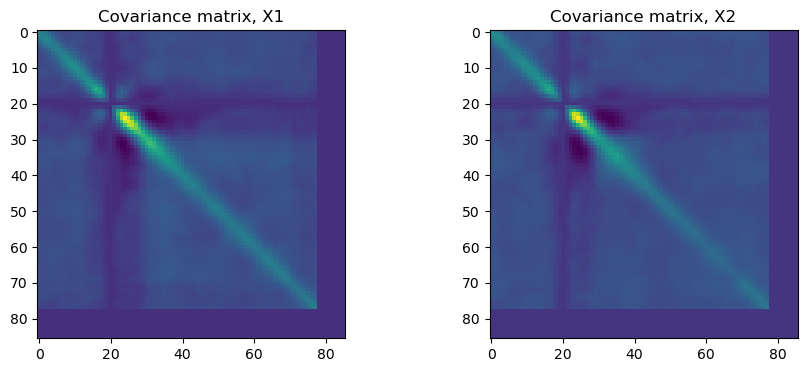

In [77]:
# compute covariance matrices
centered_X1 = np.transpose(X1) - np.mean(X1, axis=1)
covariance_matrix_X1 = np.cov(centered_X1, rowvar=False)
centered_X2 = np.transpose(X2) - np.mean(X2, axis=1)
covariance_matrix_X2 = np.cov(centered_X2, rowvar=False)

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.imshow(covariance_matrix_X1)
ax1.set_title('Covariance matrix, X1')

# Plot data on the second subplot
ax2.imshow(covariance_matrix_X2)
ax2.set_title('Covariance matrix, X2')
plt.subplots_adjust(wspace=0.4)
plt.show()

/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

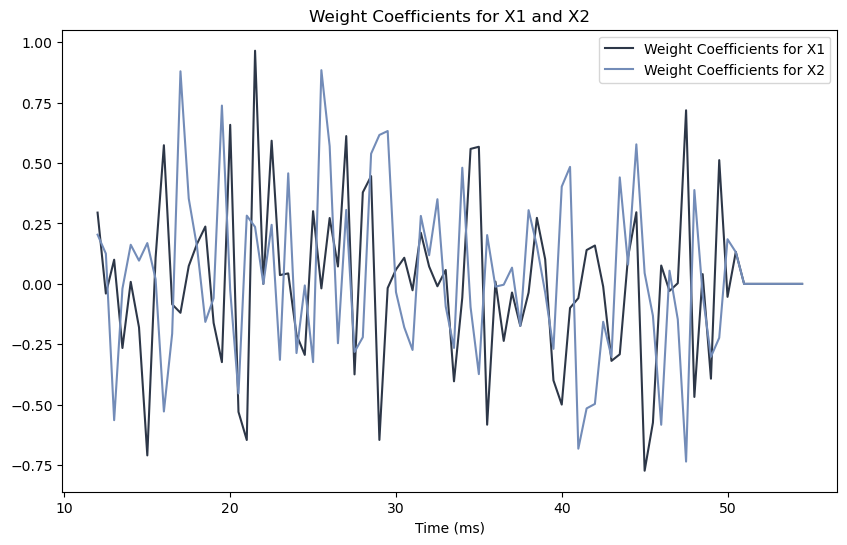

In [91]:
# compute weight coefficients
#tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients_X1 = models.kfold_logisticregression_prsubject_stratified(X1, y_X1, groups_X1, onerow = False)
#tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients_X2 = models.kfold_logisticregression_prsubject_stratified(X2, y_X2, groups_X2, onerow = False)
#W1 = np.mean(all_subject_coefficients_X1, axis=0)
#W2 = np.mean(all_subject_coefficients_X2, axis=0)
scores, mean_score, coefficients_X1 = models.logo_logreg_model(X1, y_X1, groups_X1, onerow =False)
scores, mean_score, coefficients_X2 = models.logo_logreg_model(X2, y_X2, groups_X2, onerow =False)
W1 = np.mean(coefficients_X1, axis=0)
W2 = np.mean(coefficients_X2, axis=0)


# Define the color palette and background color
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']
background_color = '#F8F8F8'


# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(X1.shape[0]) / 2000 * 1000 + 12, W1, color=colorpalette[0], label='Weight Coefficients for X1')
ax.plot(np.arange(X1.shape[0]) / 2000 * 1000 + 12, W2, color=colorpalette[1], label='Weight Coefficients for X2')
ax.set_title('Weight Coefficients for X1 and X2')
ax.set_xlabel('Time (ms)')
ax.legend()

plt.savefig('LogRegLOGOW1W2norm.png', dpi=300)  # Specify the desired filename and DPI

# Show the plot
plt.show()

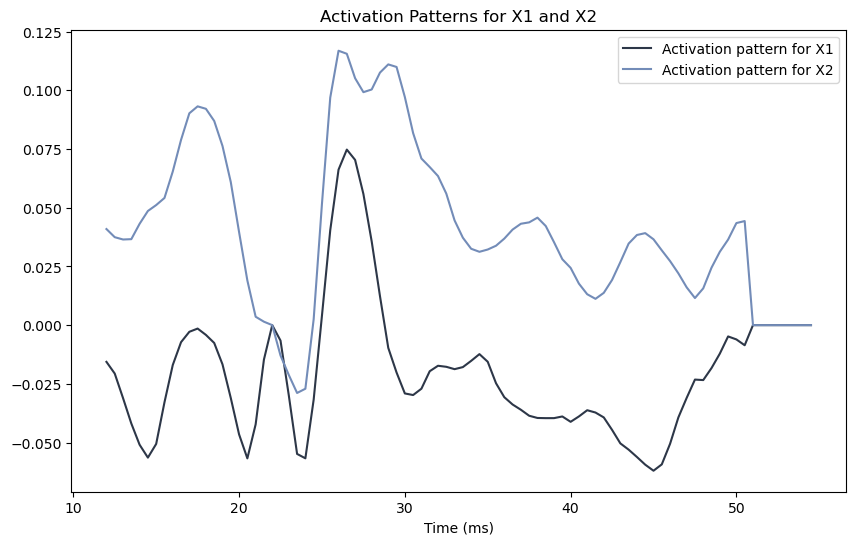

In [92]:
# compute the activation pattern of X1 and X2
A1 = covariance_matrix_X1 @ W1
A2 = covariance_matrix_X2 @ W2

# Define the color palette and background color
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']
background_color = '#F8F8F8'

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(X1.shape[0]) / 2000 * 1000 + 12, A1, color=colorpalette[0], label='Activation pattern for X1')
ax.plot(np.arange(X1.shape[0]) / 2000 * 1000 + 12, A2, color=colorpalette[1], label='Activation pattern for X2')
ax.set_title('Activation Patterns for X1 and X2')
ax.set_xlabel('Time (ms)')
ax.legend()


plt.savefig('LogRegLOGOActivationsX1X2norm.png', dpi=300)  # Specify the desired filename and DPI

# Show the plot
plt.show()



In [80]:
import scipy
#scipy.stats.norm.sf(abs(sum_scaled))*86
pvalue = scipy.stats.norm.isf(0.05 / 86 /2)
print(f"the significant p value: {pvalue}")

the significant p value: 3.4401483795642562


In [81]:
x = [12., 12.5, 13., 13.5, 14., 14.5, 15., 15.5, 16., 16.5, 17., 17.5, 18., 18.5,
 19., 19.5, 20., 20.5, 21., 21.5, 22., 22.5, 23., 23.5, 24., 24.5, 25., 25.5,
 26., 26.5, 27., 27.5, 28., 28.5, 29., 29.5, 30., 30.5, 31., 31.5, 32., 32.5,
 33., 33.5, 34., 34.5, 35., 35.5, 36., 36.5, 37., 37.5, 38., 38.5, 39., 39.5,
 40., 40.5, 41., 41.5, 42., 42.5, 43., 43.5, 44., 44.5, 45., 45.5, 46., 46.5,
 47., 47.5, 48., 48.5, 49., 49.5, 50., 50.5, 51., 51.5, 52., 52.5, 53., 53.5,
 54., 54.5]

In [93]:
# "NPAIR" method Weight and split actvation patterns
sum_scaled = (A1 + A2)/ (np.std(A1 - A2))

# finding intersections of pvalue and NPAIR activation pattern
from scipy.interpolate import interp1d
from scipy.optimize import brentq

# Create an interpolation of your data
f = interp1d(x, sum_scaled - pvalue, kind='cubic')

# List to store intersections
intersections_positive = []

# For loop that goes through each interval in your data
for i in range(len(x) - 1):
    # Try to find a root in the current interval
    try:
        root = brentq(f, x[i], x[i+1])
        intersections_positive.append(root)
    except ValueError:
        # If no root in the interval, brentq raises a ValueError.
        # In that case, just proceed to the next interval
        pass


# Create an interpolation of your data
f = interp1d(x, sum_scaled + pvalue, kind='cubic')

# List to store intersections
intersections_negative = []

# For loop that goes through each interval in your data
for i in range(len(x) - 1):
    # Try to find a root in the current interval
    try:
        root = brentq(f, x[i], x[i+1])
        intersections_negative.append(root)
    except ValueError:
        # If no root in the interval, brentq raises a ValueError.
        # In that case, just proceed to the next interval
        pass


all_points_xcoor = intersections_positive + intersections_negative
print(all_points_xcoor)

[25.33450011759244, 28.675324882110157]


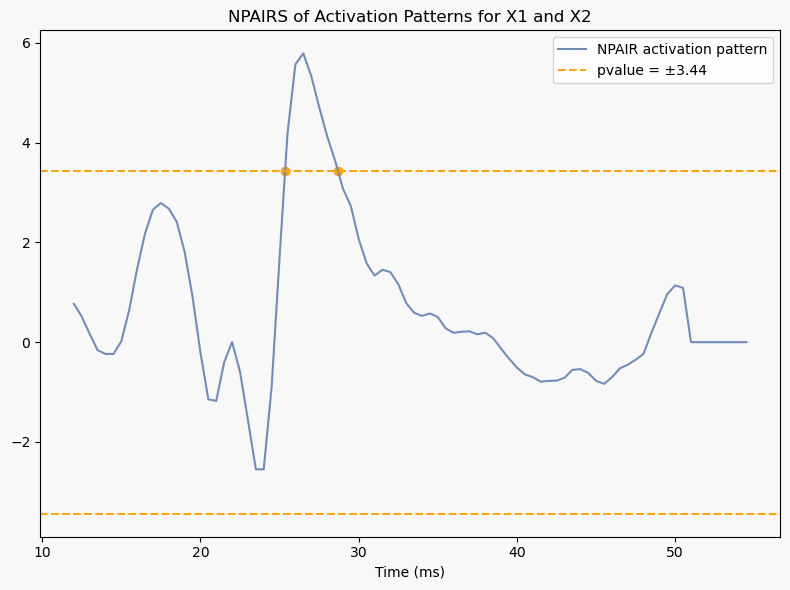

In [94]:
# "NPAIR" method Weight and split actvation patterns
sum_scaled = (A1 + A2)/ (np.std(A1 - A2))

# Create the first figure
fig1, ax1 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the first figure
ax1.set_facecolor(background_color)

# Create x values and compute sum_scaled
x = np.arange(X1.shape[0]) / 2000 * 1000 + 12

# Plot data on the first figure
ax1.plot(x, sum_scaled, color=colorpalette[1], label='NPAIR activation pattern')
ax1.set_title('NPAIRS of Activation Patterns for X1 and X2')
ax1.set_xlabel('Time (ms)')

pvalue = scipy.stats.norm.isf(0.05 / 86 / 2) # 86 features and t-test

# Add horizontal lines at y=pvalue and y=-pvalue
ax1.axhline(pvalue, color=colorpalette[2], linestyle='--', label=f'pvalue = ±{pvalue:.2f}')
ax1.axhline(-pvalue, color=colorpalette[2], linestyle='--')


# Add the points
points_x = all_points_xcoor
points_y = [pvalue, pvalue]#, pvalue, pvalue, -pvalue, -pvalue]
ax1.scatter(points_x, points_y, color=colorpalette[2])
ax1.legend()

# Adjust the layout
plt.tight_layout()

plt.savefig('LogRegLOGONPAIRSofActivationsX1X2norm.png', dpi=300)  # Specify the desired filename and DPI

plt.show()


## Other

##### Differentiate

In [ ]:
# Diffentiate X, Note that the first element of each row will be lost after differentiation since there is no previous element to calculate the difference with.    X_diff = np.diff(X, axis=1)
X_diff = np.diff(X, axis=1)

##### FFT
For other representation of the data

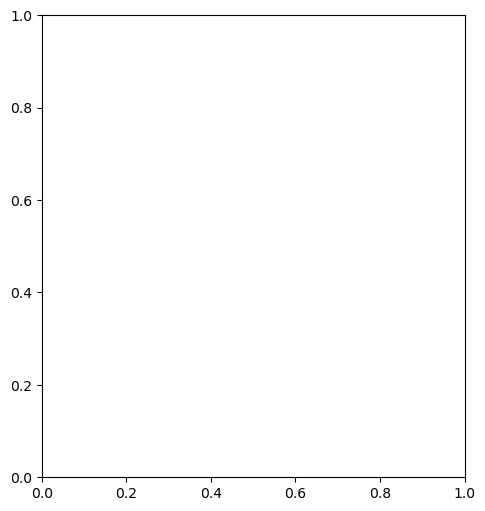

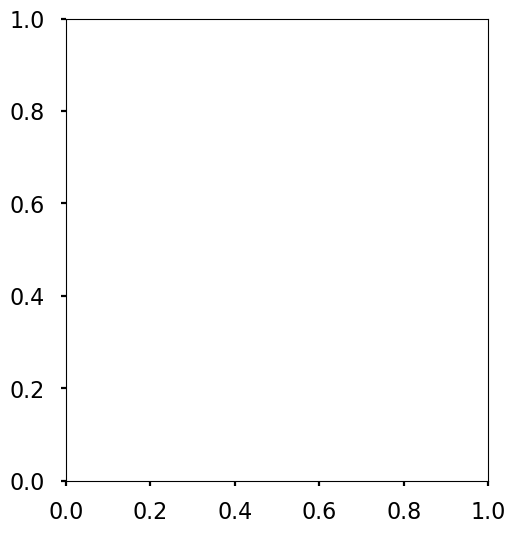

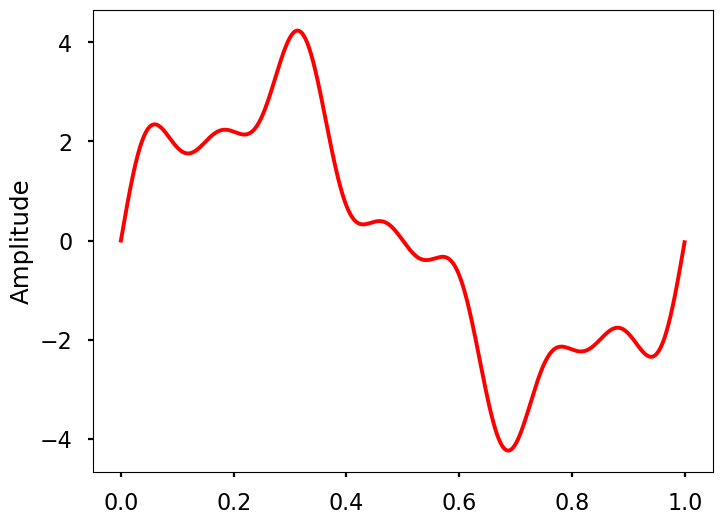

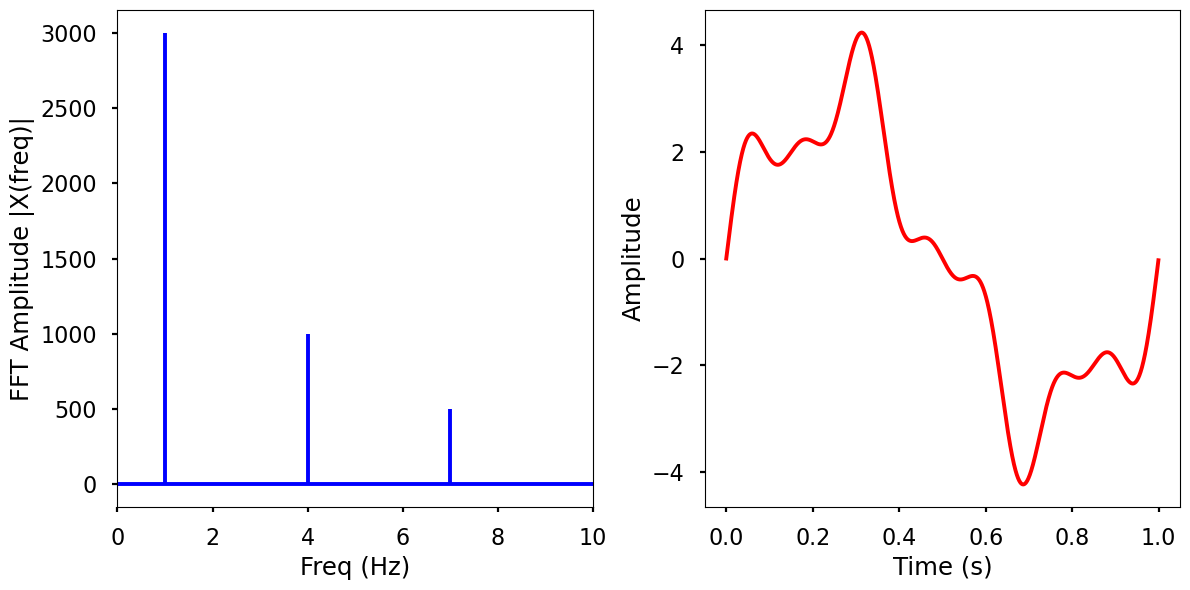

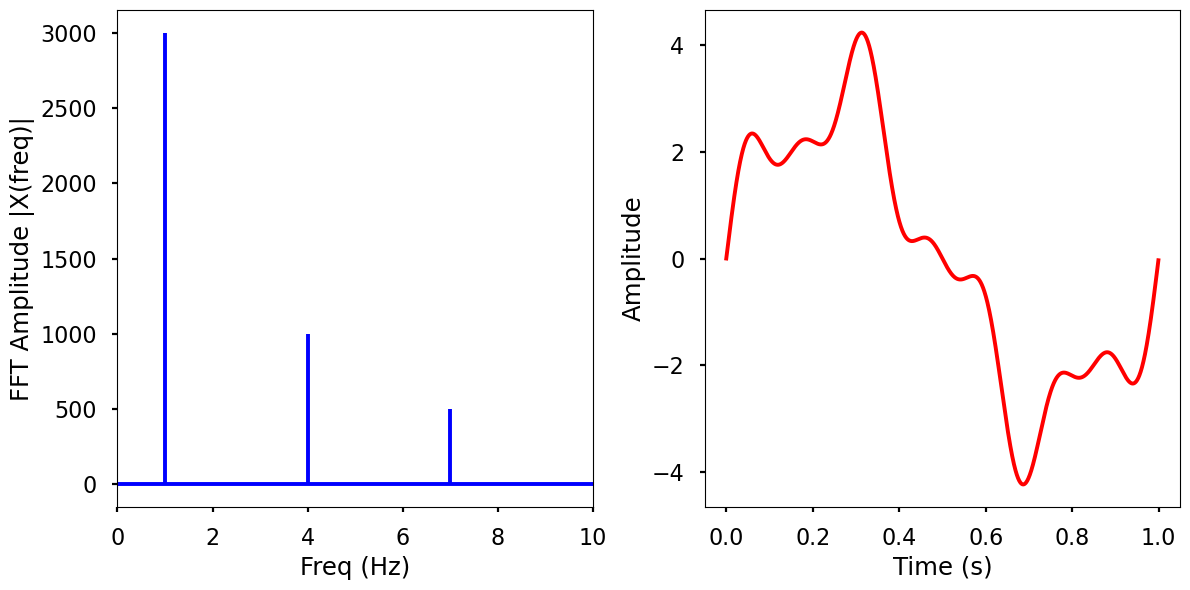

In [ ]:

from scipy.fftpack import fft, ifft
def FFT(X):
    plt.style.use('seaborn-poster')
    sr = 2000  # Sample rate (Hz)
    ts = 1.0/sr # sampling interval
    t = np.arange(0,1,ts)

    X = fft(X)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T

    plt.figure(figsize = (12, 6))
    plt.subplot(121)

    plt.stem(freq, np.abs(X), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xlim(0, 10)

    plt.subplot(122)
    plt.plot(t, ifft(X), 'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    '''

    for i in range(np.transpose(X).shape[0]):
        # Compute the power spectrum for signal i
        ps = np.abs(np.fft.rfft(np.transpose(X)[i])) ** 2
        
        # Compute the corresponding frequencies
        freqs = np.fft.rfftfreq(len(np.transpose(X)[i]), d=1/fs)
        
        # Plot the power spectrum for signal i
        plt.plot(freqs, ps)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.title(f'Power spectrum for signal {i+1}')
        plt.show()
    ''' 
    X_fft = np.fft.fft(X, axis=0)# virker ikke
    return X_fft


X_fft = FFT(X) #prøv også X_norm




# LOSO logistic regression

In [8]:
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X, y, onerow =False)#LOSO leave one subject out

print(scores)

[0.676056338028169, 0.6056338028169014, 0.7112676056338029, 0.7183098591549296, 0.6126760563380281, 0.7092198581560284, 0.7375886524822695, 0.6808510638297872, 0.6808510638297872, 0.6666666666666666]
